# **Pizza Price Prediction** using **Linear Regression**

In this case-study we would take data from DataSet search on Google on pizza price records.

So without a do lets dive into the **Journey of building an ML model**

>### **Import Modules**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

>### **Dataset**

**This Dataset has the price record in the Indonesian Currency, you can convert indonesian Rupiah to your own currency.**

Thanks to **Kaggle** for this Dataset.

In [2]:
pizza_df = pd.read_csv("pizza_price_records.csv")

In [3]:
pizza_df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


>### **Data Cleaning**

In [4]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [5]:
pizza_df.isna().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

**The Data is Clean and has no missing values**

>### **Data Visualization**

In [6]:
pizza_df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [7]:
pizza_df['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

<AxesSubplot:xlabel='count', ylabel='topping'>

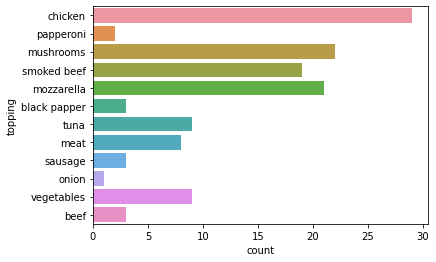

In [8]:
sns.countplot(data = pizza_df,y = 'topping')

<AxesSubplot:xlabel='count', ylabel='variant'>

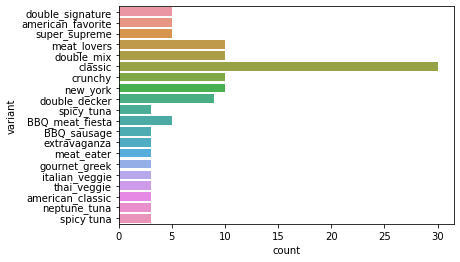

In [9]:
sns.countplot(data = pizza_df,y = 'variant')

>### **Data Wrangling**

Here, our **target feature** is of data type **object** as the price_rupiah column has enteries of type object.
So, we modify it to **float64** using **replace**, **apply** and **astype** method as shown below

In [10]:
pizza_df.price_rupiah = pizza_df.price_rupiah.apply(lambda x : x.replace('Rp',''))  #replcae Rp to ''
pizza_df.price_rupiah = pizza_df.price_rupiah.apply(lambda x : x.replace(',',''))   #replcae ',' to ''

In [11]:
pizza_df.head(2)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes


In [12]:
pizza_df['price_rupiah'] = pizza_df['price_rupiah'].astype('float64')

In [13]:
pizza_df['price_rupiah'].dtype

dtype('float64')

>### **Training Model** 

we want to predict price of pizza based on the diameter of the pizza using Linear Regression so we would drop all other variables, but we can also create different model like multiple regression and also some classification techniques, where the impact of extra cheese, extra sauce,... such features on the price can be taken into consideration. 

In [14]:
pizza_price_model = LinearRegression()

In [15]:
y = pizza_df.price_rupiah

In [16]:
X = pizza_df.drop(['company', 'price_rupiah', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'], axis = 1)

In [17]:
pizza_price_model.fit(X,y)

LinearRegression()

>### **Performance Analysis**

In [18]:
y_pred = pizza_price_model.predict(X)

In [19]:
r_error = r2_score(y, y_pred)

In [20]:
print(r_error)

0.6838914266482493


>### **Conclusion**

Accuaracy of the model is **68.39%**. This also concludes that diameter of the pizza is not solely capable for prediction of price of pizza. Other features play an important role. 